In [381]:
# Initial imports
import os
import requests
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from alpaca_trade_api.rest import REST, TimeFrame
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

### Part 1 - Personal Finance Planner

#### Collect Crypto Prices Using the `requests` Library

In [382]:
#initialise my_btc and my_eth variables and assign them values of 1.2 and 5.3 respectively.
my_btc = 1.2
my_eth = 5.3

In [383]:
# Create variable to hold ticker api url
url_ticker = "https://api.alternative.me/v2/ticker/?convert=CAD"

In [384]:
# Execute GET request for ticker
requests.get(url_ticker)

<Response [200]>

In [385]:
# Execute GET request and store response for ticker
response_data_ticker = requests.get(url_ticker)

In [386]:
# Get ticker content
response_content_ticker = response_data_ticker.content
print(response_content_ticker)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18989818,\n\t\t\t"total_supply": 18989818,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 41119.0000000000000000,\n\t\t\t\t\t"volume_24h": 20470377753,\n\t\t\t\t\t"market_cap": 781087427388,\n\t\t\t\t\t"percentage_change_1h": 0.4805038489532070,\n\t\t\t\t\t"percentage_change_24h": -0.5939272635347970,\n\t\t\t\t\t"percentage_change_7d": 8.6297180157718900,\n\t\t\t\t\t"percent_change_1h": 0.4805038489532070,\n\t\t\t\t\t"percent_change_24h": -0.5939272635347970,\n\t\t\t\t\t"percent_change_7d": 8.6297180157718900\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 51764.7091,\n\t\t\t\t\t"volume_24h": 25770158553.2517,\n\t\t\t\t\t"market_cap": 983310962338.754,\n\t\t\t\t\t"percent_change_1h": 0.4805038489532070,\n\t\t\t\t\t"percent_change_24h": -0.5939272635347970,\n\t\t\t\t\t"pe

In [387]:
# Format ticker data as a raw json file
data_ticker = response_data_ticker.json()
print(data_ticker)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18989818, 'total_supply': 18989818, 'max_supply': 21000000, 'quotes': {'USD': {'price': 41119.0, 'volume_24h': 20470377753, 'market_cap': 781087427388, 'percentage_change_1h': 0.480503848953207, 'percentage_change_24h': -0.593927263534797, 'percentage_change_7d': 8.62971801577189, 'percent_change_1h': 0.480503848953207, 'percent_change_24h': -0.593927263534797, 'percent_change_7d': 8.62971801577189}, 'CAD': {'price': 51764.7091, 'volume_24h': 25770158553.2517, 'market_cap': 983310962338.754, 'percent_change_1h': 0.480503848953207, 'percent_change_24h': -0.593927263534797, 'percent_change_7d': 8.62971801577189}}, 'last_updated': 1647876809}, '1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 120052669, 'total_supply': 120052669, 'max_supply': 0, 'quotes': {'USD': {'price': 2944.8, 'volume_24h': 138153

In [388]:
# Add indents to ticker JSON and output to screen
print(json.dumps(data_ticker, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18989818,
            "total_supply": 18989818,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 41119.0,
                    "volume_24h": 20470377753,
                    "market_cap": 781087427388,
                    "percentage_change_1h": 0.480503848953207,
                    "percentage_change_24h": -0.593927263534797,
                    "percentage_change_7d": 8.62971801577189,
                    "percent_change_1h": 0.480503848953207,
                    "percent_change_24h": -0.593927263534797,
                    "percent_change_7d": 8.62971801577189
                },
                "CAD": {
                    "price": 51764.7091,
                    "volume_24h": 25770158553.2517,
                   

In [389]:
#slice the jason for crypto prices
price_btc = data_ticker["data"]["1"]["quotes"]["CAD"]["price"]
print(price_btc)
price_eth = data_ticker["data"]["1027"]["quotes"]["CAD"]["price"]
print(price_eth)

51764.7091
3707.20872


In [390]:
#calculate individual crypto value
crypto = []
print(crypto)

btc_value = price_btc*my_btc
print(btc_value)
crypto.append(btc_value)

eth_value = price_eth*my_eth
print(eth_value)
crypto.append(eth_value)

print(crypto)

[]
62117.65092
19648.206216
[62117.65092, 19648.206216]


In [391]:
#calculate crypto portfolio value
crypto_total_value = sum(crypto)
print(f"Portfolio value of cryptocurrencies: {crypto_total_value}")

Portfolio value of cryptocurrencies: 81765.857136


#### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [392]:
#Create two variables and assign values
my_agg = 200
my_spy = 50

In [393]:
# Load .env enviroment variables
load_dotenv()

True

In [394]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [395]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
print(f"Alpaca Key type: {alpaca_api_key}")
print(f"Alpaca Secret Key type: {alpaca_secret_key}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>
Alpaca Key type: PKGXHXSPNLQ4UA10GHCF
Alpaca Secret Key type: DxcdCKZRRsCgM4xS8FXai2h0Xb1jABMxN4NgQO2H


In [396]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [397]:
# Format current date as ISO format
today = pd.Timestamp("2022-03-17", tz="America/New_York").isoformat()
print(today)

2022-03-17T00:00:00-04:00


In [398]:
# Set the tickers
tickers = ["SPY", "AGG"]

In [399]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"
#frequency = "1D"

In [400]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_bars(
    tickers,
    TimeFrame.Day,
    start = today,
    end = today,
    limit = 1000
).df

# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-17 04:00:00+00:00,107.87,108.06,107.73,107.86,8005258,24093,107.889900,AGG
2022-03-17 04:00:00+00:00,433.70,441.07,433.19,441.07,100157174,784018,437.706981,SPY


In [401]:
# Fetch the closing prices of FB and TWTR

AGG_closing_prices = df_portfolio.iloc[0]["close"]
print(f"closing value of AGG: {AGG_closing_prices}")

SPY_closing_prices = df_portfolio.iloc[1]["close"]
print(f"closing value of SPY: {SPY_closing_prices}")

closing value of AGG: 107.86
closing value of SPY: 441.07


In [402]:
#calculate share and bond value
shares = []
print(shares)
AGG_Current_value = AGG_closing_prices*my_agg
shares.append(AGG_Current_value)
SPY_Current_value = SPY_closing_prices*my_spy
shares.append(SPY_Current_value)
print(shares)

[]
[21572.0, 22053.5]


In [403]:
#calculate shares portfolio value
shares_total_value = sum(shares)
print(f"Total value of AGG and SPY shares: {shares_total_value}")

Total value of AGG and SPY shares: 43625.5


#### Savings Health Analysis

In [455]:
#Set a variable, create a DataFrame, add data to it and set index
monthly_income = 12000
df_savings = pd.DataFrame(columns=["Investment Type","Amount"])
#df_savings = df_savings.convert_dtypes()
df_savings.loc[0] = ["crypto",crypto_total_value]
df_savings.loc[1] = ["shares",shares_total_value]
df_savings.set_index("Investment Type")

,Amount
Investment Type,
crypto,81765.857136
shares,43625.500000


In [452]:
#df_savings["Amount"] = pd.to_numeric(df_savings['Amount'])

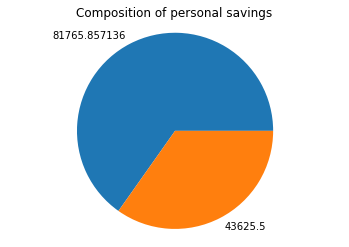

In [457]:
#plot pie chart to visualise the savings
#plot = df_savings.plot.pie(kind='pie', y='Amount', figsize=(11, 6))
#df_savings.plot.pie(y='Amount', figsize=(11, 6))
plt.pie(df_savings["Amount"], labels=df_savings["Amount"])
plt.title('Composition of personal savings')
plt.axis('equal')
plt.show()

In [442]:
#calculate emergency fund
ideal_emergency_fund = 3*monthly_income
print(f"ideal emergency fund: {ideal_emergency_fund}")

ideal emergency fund: 36000


In [408]:
#calculate total savings using Amount collumn of the DataFrame
total_savings = df_savings.sum(axis = 0, numeric_only = True)
total_savings = int(total_savings)
print(total_savings)

125391


In [409]:
#check savings against emergency fund
if (total_savings > ideal_emergency_fund):
    print("Congratulations, you have enough money in the funds you own")
elif (total_savings == ideal_emergency_fund):
    print("Congratulations, you have reached the financial goal")
else:
    fund_shortfall = ideal_emergency_fund - total_savings
    print(f"You are falling short from reaching the goal by: ${fund_shortfall} amount")

Congratulations, you have enough money in the funds you own


### Part 2 - Retirement Planning

In [410]:
#tickers_composition = [60,40]

In [411]:
#calculate the historical data iso format
past = pd.Timestamp("2017-03-17", tz="America/New_York").isoformat()
print(past)

2017-03-17T00:00:00-04:00


In [412]:
# Get current closing prices for FB and TWTR
df_SPY_5years = alpaca.get_bars(
    "SPY",
    TimeFrame.Day,
    start = past,
    end = today,
    limit = 1000
).df

# Display SPY sample data
df_SPY_5years

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-03-17 04:00:00+00:00,237.79,237.97,237.03,237.1008,89002111,225269,237.526209
2017-03-20 04:00:00+00:00,237.03,237.36,236.32,236.7400,52536979,169612,236.909398
2017-03-21 04:00:00+00:00,237.49,237.61,233.58,233.7600,131809275,443599,234.853857
2017-03-22 04:00:00+00:00,233.78,234.61,233.05,234.2500,97569204,307469,233.932509
2017-03-23 04:00:00+00:00,234.01,235.34,233.60,233.9400,100410277,333903,234.388790
...,...,...,...,...,...,...,...
2021-03-02 05:00:00+00:00,389.87,390.07,386.00,386.5600,79595362,513115,388.267790
2021-03-03 05:00:00+00:00,385.83,386.83,381.31,381.4000,120390246,807411,384.022610
2021-03-04 05:00:00+00:00,381.35,384.00,371.88,376.6799,183519020,1338751,378.282319


In [413]:
#drop columns from the SPY df
df_SPY_5years = df_SPY_5years.drop(['trade_count','vwap','volume'], axis = 1)
df_SPY_5years

,open,high,low,close
timestamp,,,,
2017-03-17 04:00:00+00:00,237.79,237.97,237.03,237.1008
2017-03-20 04:00:00+00:00,237.03,237.36,236.32,236.7400
2017-03-21 04:00:00+00:00,237.49,237.61,233.58,233.7600
2017-03-22 04:00:00+00:00,233.78,234.61,233.05,234.2500
2017-03-23 04:00:00+00:00,234.01,235.34,233.60,233.9400
...,...,...,...,...
2021-03-02 05:00:00+00:00,389.87,390.07,386.00,386.5600
2021-03-03 05:00:00+00:00,385.83,386.83,381.31,381.4000
2021-03-04 05:00:00+00:00,381.35,384.00,371.88,376.6799


In [414]:
# Get current closing prices for FB and TWTR
df_AGG_5years = alpaca.get_bars(
    "AGG",
    TimeFrame.Day,
    start = past,
    end = today,
    limit = 1000
).df

# Display AGG sample data
df_AGG_5years

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-03-17 04:00:00+00:00,107.72,107.9100,107.6901,107.88,2368799,10846,107.859402
2017-03-20 04:00:00+00:00,107.86,108.0500,107.8401,108.05,1635249,8198,107.961544
2017-03-21 04:00:00+00:00,107.93,108.2700,107.9300,108.27,2049680,12024,108.175725
2017-03-22 04:00:00+00:00,108.44,108.5400,108.3600,108.42,2643641,11111,108.455049
2017-03-23 04:00:00+00:00,108.44,108.5100,108.2635,108.45,2071485,10901,108.417635
...,...,...,...,...,...,...,...
2021-03-02 05:00:00+00:00,115.04,115.1200,114.9500,115.11,10111335,29196,115.031688
2021-03-03 05:00:00+00:00,114.80,114.8300,114.6000,114.69,10317816,27664,114.725856
2021-03-04 05:00:00+00:00,114.79,114.8000,114.2600,114.36,5953649,22047,114.499150


In [415]:
#drop columns from the AGG df
df_AGG_5years = df_AGG_5years.drop(['trade_count','vwap','volume'], axis = 1)
df_AGG_5years

,open,high,low,close
timestamp,,,,
2017-03-17 04:00:00+00:00,107.72,107.9100,107.6901,107.88
2017-03-20 04:00:00+00:00,107.86,108.0500,107.8401,108.05
2017-03-21 04:00:00+00:00,107.93,108.2700,107.9300,108.27
2017-03-22 04:00:00+00:00,108.44,108.5400,108.3600,108.42
2017-03-23 04:00:00+00:00,108.44,108.5100,108.2635,108.45
...,...,...,...,...
2021-03-02 05:00:00+00:00,115.04,115.1200,114.9500,115.11
2021-03-03 05:00:00+00:00,114.80,114.8300,114.6000,114.69
2021-03-04 05:00:00+00:00,114.79,114.8000,114.2600,114.36


In [416]:
#concatenate the 2 df - SPY and AGG
df_portfolio_5years = pd.concat([df_SPY_5years,df_AGG_5years],keys = ["SPY","AGG"],axis=1)
df_portfolio_5years

SPY                               AGG            \
                             open    high     low     close    open      high   
timestamp                                                                       
2017-03-17 04:00:00+00:00  237.79  237.97  237.03  237.1008  107.72  107.9100   
2017-03-20 04:00:00+00:00  237.03  237.36  236.32  236.7400  107.86  108.0500   
2017-03-21 04:00:00+00:00  237.49  237.61  233.58  233.7600  107.93  108.2700   
2017-03-22 04:00:00+00:00  233.78  234.61  233.05  234.2500  108.44  108.5400   
2017-03-23 04:00:00+00:00  234.01  235.34  233.60  233.9400  108.44  108.5100   
...                           ...     ...     ...       ...     ...       ...   
2021-03-02 05:00:00+00:00  389.87  390.07  386.00  386.5600  115.04  115.1200   
2021-03-03 05:00:00+00:00  385.83  386.83  381.31  381.4000  114.80  114.8300   
2021-03-04 05:00:00+00:00  381.35  384.00  371.88  376.6799  114.79  114.8000   
2021-03-05 05:00:00+00:00  380.55  384.76  372.64  383.5600  114.17  114.3197   
2021-03-08 05:00:00+00:00  384.67  387.68  381.42  381.7200  114.20  114.2300   

                                             
                                low   close  
timestamp                                    
2017-03-17 04:00:00+00:00  107.6901  107.88  
2017-03-20 04:00:00+00:00  107.8401  108.05  
2017-03-21 04:00:00+00:00  107.9300  108.27  
2017-03-22 04:00:00+00:00  108.3600  108.42  
2017-03-23 04:00:00+00:00  108.2635  108.45  
...                             ...     ...  
2021-03-02 05:00:00+00:00  114.9500  115.11  
2021-03-03 05:00:00+00:00  114.6000  114.69  
2021-03-04 05:00:00+00:00  114.2600  114.36  
2021-03-05 05:00:00+00:00  114.0500  114.28  
2021-03-08 05:00:00+00:00  113.8300  113.83  

[1000 rows x 8 columns]

In [417]:
df_portfolio_5years.columns

MultiIndex([('SPY',  'open'),
            ('SPY',  'high'),
            ('SPY',   'low'),
            ('SPY', 'close'),
            ('AGG',  'open'),
            ('AGG',  'high'),
            ('AGG',   'low'),
            ('AGG', 'close')],
           )

In [418]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_portfolio_5years,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [419]:
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Home\Documents\Monash FinTech\Unit-5-Financial Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011078,0.990860,0.999828,0.993783,0.998470,1.003349,0.984688,1.002308,1.008388,0.988284,...,0.988429,1.010090,0.994460,0.994825,1.011817,0.985992,1.002732,0.991904,1.010554,1.002047
2,1.013201,1.002966,1.009654,0.999915,1.008272,1.002978,0.982374,1.002855,1.003858,0.987231,...,0.986749,1.009491,0.987472,0.989511,1.004794,0.997316,1.008397,0.997678,1.007054,1.014897
3,1.018317,1.011181,1.005832,0.995863,1.007007,0.995579,0.980829,1.015641,1.005232,0.983962,...,0.981469,1.006511,0.986286,0.992037,1.001525,0.987380,1.008635,1.003494,1.009780,1.010994
4,1.011263,1.004277,1.023648,1.001151,0.993607,0.984297,0.981723,1.027346,0.996515,0.985240,...,0.987561,1.016624,0.982899,0.991877,0.987703,0.992237,1.003218,0.998501,1.025194,1.013122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.312480,16.183914,10.140398,14.689804,11.688816,8.328912,19.244727,20.000215,8.844149,5.540940,...,8.636198,32.145426,6.747478,10.702639,26.344545,13.357572,21.034577,25.547257,15.126349,20.794503
7557,3.316997,16.237470,10.234325,14.913917,11.626368,8.390921,19.442911,20.248369,8.816106,5.544922,...,8.595475,32.242658,6.796727,10.607894,26.154964,13.376107,20.928866,25.330494,14.885679,20.801507
7558,3.286341,16.236579,10.251280,14.794367,11.804355,8.434546,19.435373,20.118421,8.785560,5.514578,...,8.544571,32.123059,6.777433,10.654703,26.181376,13.250368,21.008353,25.395632,14.770999,20.555726
7559,3.279092,16.354302,10.154966,14.675686,11.881491,8.315649,19.363238,19.938494,8.851602,5.518808,...,8.491440,32.418241,6.854986,10.707084,25.984300,13.233956,21.000158,25.105214,14.758990,20.477407


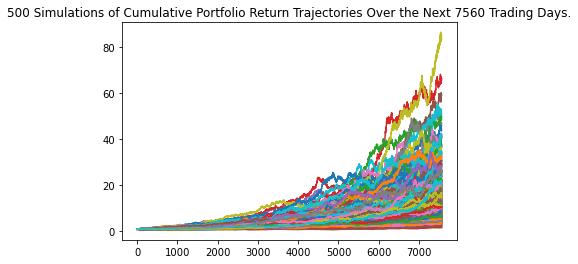

In [420]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

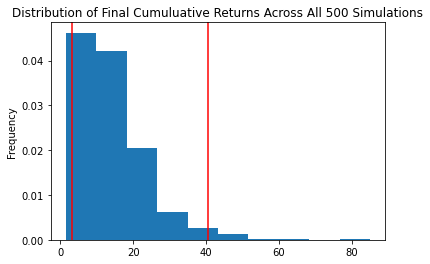

In [421]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

Retirement Analysis

In [422]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             14.300275
std               9.792528
min               1.497744
25%               7.795850
50%              12.008306
75%              18.653232
max              85.047522
95% CI Lower      3.232666
95% CI Upper     40.440563
Name: 7560, dtype: float64


In [423]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 investments.
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 5 years will end within in the range of $64653.32 and $808811.27


In [424]:
#Lower and upper confidence intervals based on 50% increase in initial investment which is 30000.
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $30,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next 5 years will end within in the range of $96979.97 and $1213216.9
